## **CASO 8: CLASIFICACIÓN SEGURIDAD CIBERNÉTICA**

Usted trabaja para una organización en el equipo de seguridad cibernética y cuenta con los registros de transacciones dadas en diferentes momentos. Usted quiere revisar si dichas transacciones son normales o son ataques, para lo cual decide construir un experimento de clasificación. Cuenta con 8.866 transacciones con diferentes columnas. Identifique el modelo que mejor ajuste los datos con la mejor matriz de confusión y un f1 score superior al 80%.

## Metodología ASUM-DM

1. **Entendimiento del Negocio:** La organización de seguridad cibernética busca clasificar la procedencia de las transacciones entre normales o ataques.

2. **Enfoque Analítico:** Diseñar un experimento que permita clasificar los registros de transacciones

3. **Requerimiento de Datos:** Registro de transacciones de la organización

4. **Recolección de Datos:**

    <img src="../Datasets//Datos_CiberseguridadCibernética.png" alt="Datos EB" width="500" />

5. **Entendimiento de Datos:**
    - Identificar datos nulos
    - Exploración univariada de los datos 
    - Exploración multivariada de los datos
    - Identificación de correlación y multicolinealidad

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('../Datasets/datos_caso_8.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8866 entries, 0 to 8865
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Timestamp       8866 non-null   object
 1   Source_IP       8866 non-null   object
 2   Destination_IP  8866 non-null   object
 3   Port            8866 non-null   int64 
 4   Request_Type    8866 non-null   object
 5   Protocol        8866 non-null   object
 6   Payload_Size    8866 non-null   int64 
 7   User_Agent      8866 non-null   object
 8   Status          8866 non-null   object
 9   Intrusion       8866 non-null   int64 
 10  Scan_Type       8866 non-null   object
dtypes: int64(3), object(8)
memory usage: 762.1+ KB


In [4]:
data

,Timestamp,Source_IP,Destination_IP,Port,Request_Type,Protocol,Payload_Size,User_Agent,Status,Intrusion,Scan_Type
0,2025-06-06 06:04:08,192.168.54.167,220.159.139.17,443,SSH,ICMP,2954,Mozilla/5.0,Success,0,Normal
1,2025-06-04 15:20:59,192.168.193.254,201.83.205.167,80,FTP,UDP,206,Wget/1.20.3,Success,0,Normal
2,2025-06-03 07:23:49,192.168.91.17,211.0.177.164,21,SSH,ICMP,977,nmap/7.80,Success,0,Normal
3,2025-06-03 11:35:42,192.168.108.75,187.49.21.67,22,HTTP,TCP,521,curl/7.68.0,Success,0,Normal
4,2025-06-05 06:09:02,192.168.245.254,189.62.16.12,53,Telnet,TCP,251,Wget/1.20.3,Success,0,Normal
...,...,...,...,...,...,...,...,...,...,...,...
8861,2025-06-04 22:16:23,166.225.57.211,202.34.154.193,135,DNS,ICMP,1391,Nikto/2.1.6,Failure,1,BotAttack
8862,2025-06-05 14:43:42,192.168.255.79,2.236.94.56,21,SSH,TCP,2272,curl/7.68.0,Success,0,Normal
8863,2025-06-01 23:27:15,192.168.174.115,206.61.199.249,22,SSH,TCP,2753,python-requests/2.25.1,Success,0,Normal
8864,2025-06-01 00:26:36,192.168.68.65,7.132.69.36,443,DNS,TCP,2792,nmap/7.80,Success,0,Normal


### Identificación de Datos Nulos

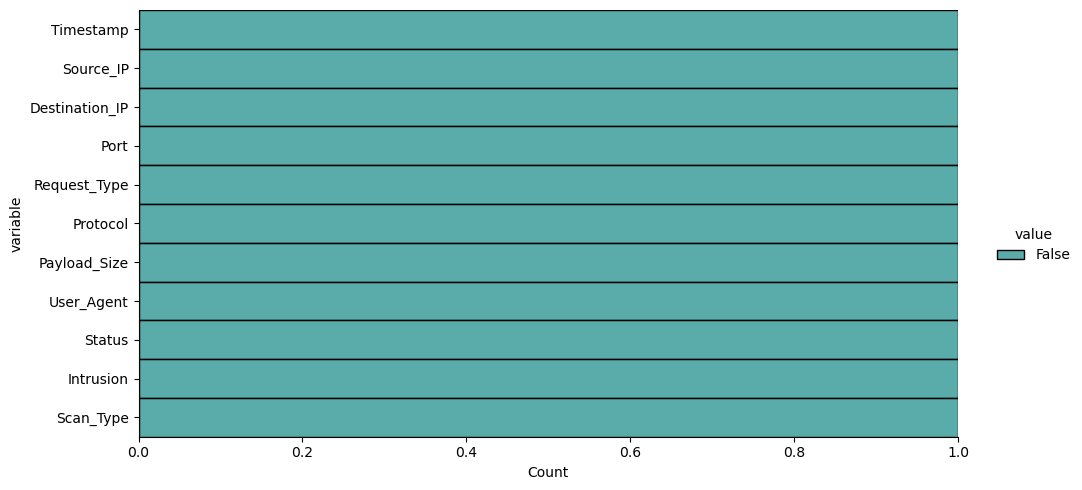

In [10]:
data.isnull().melt().pipe(lambda df: sns.displot(data=df, y = 'variable', palette='viridis', hue='value', multiple='fill', aspect=2))
plt.show()

### Exploración Univariada de los Datos

#### HISTOGRAMAS DE FRECUENCIA

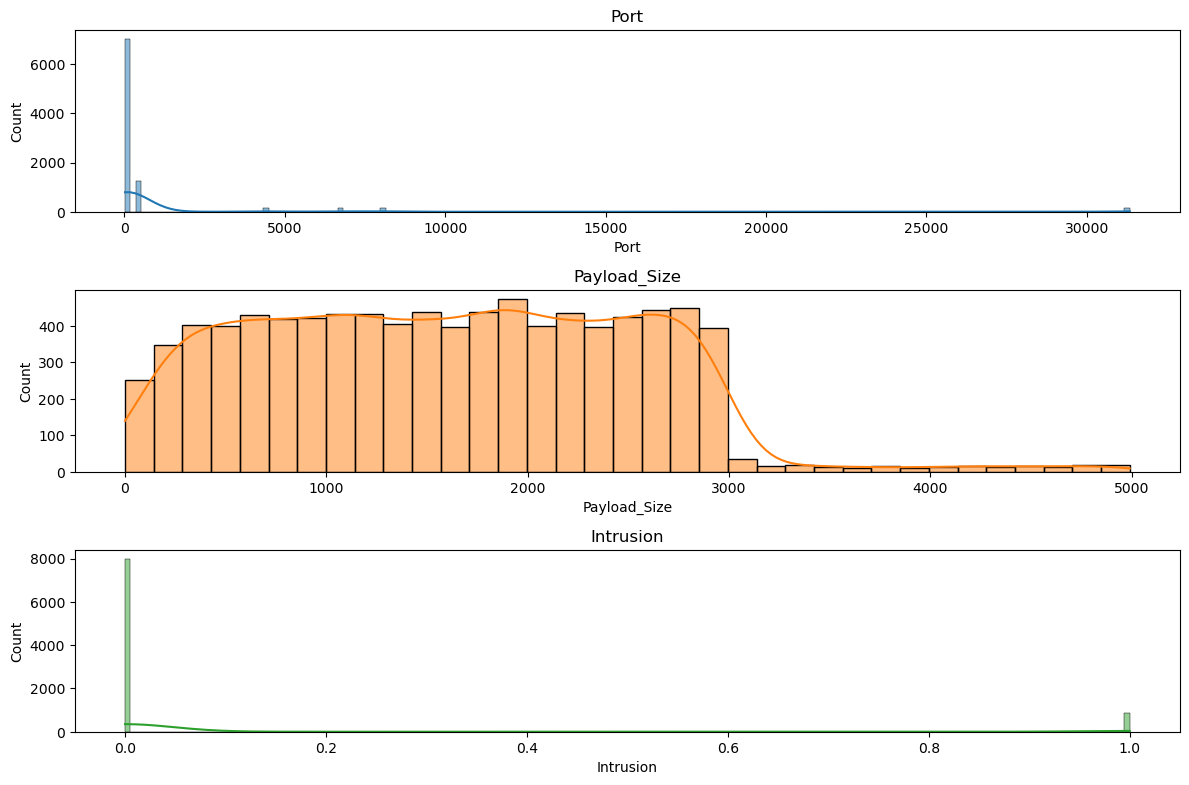

In [11]:
fig, ax = plt.subplots(3, 1, figsize=(12, 8))
ax = ax.flat
num_col = data.select_dtypes(include=['int64', 'float64']).columns # SOLO VAMOS A GRAFICAR VARIABLES NUMÉRICAS
for i, col in enumerate(num_col):
    sns.histplot(
        data = data,
        x = col,
        kde = True,
        color = (list(plt.rcParams['axes.prop_cycle']) * 7)[i]['color'],
        ax = ax[i]
    )
    ax[i].set_title(col)
fig.tight_layout()
fig.subplots_adjust(top=0.95)
plt.show()

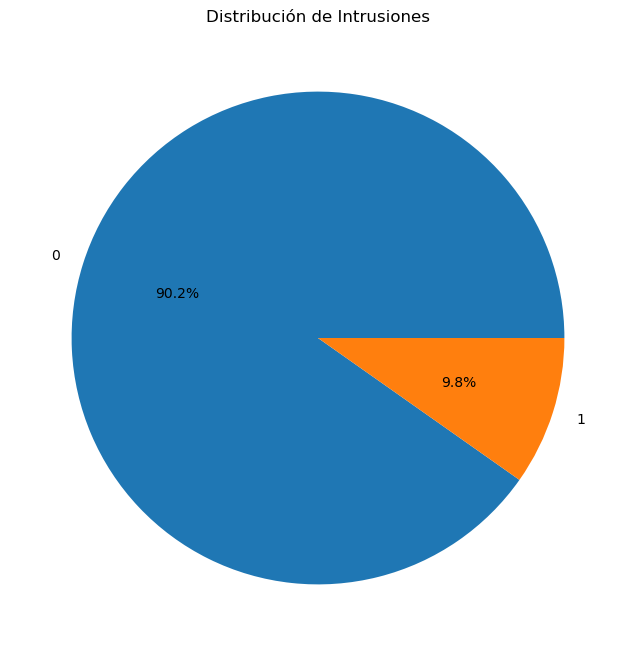

In [117]:
plt.figure(figsize=(12, 8))
plt.pie(data["Intrusion"].value_counts(), labels=data["Intrusion"].value_counts().index, autopct='%1.1f%%')
plt.title("Distribución de Intrusiones")
plt.show()

#### GRÁFICOS DE TORTA

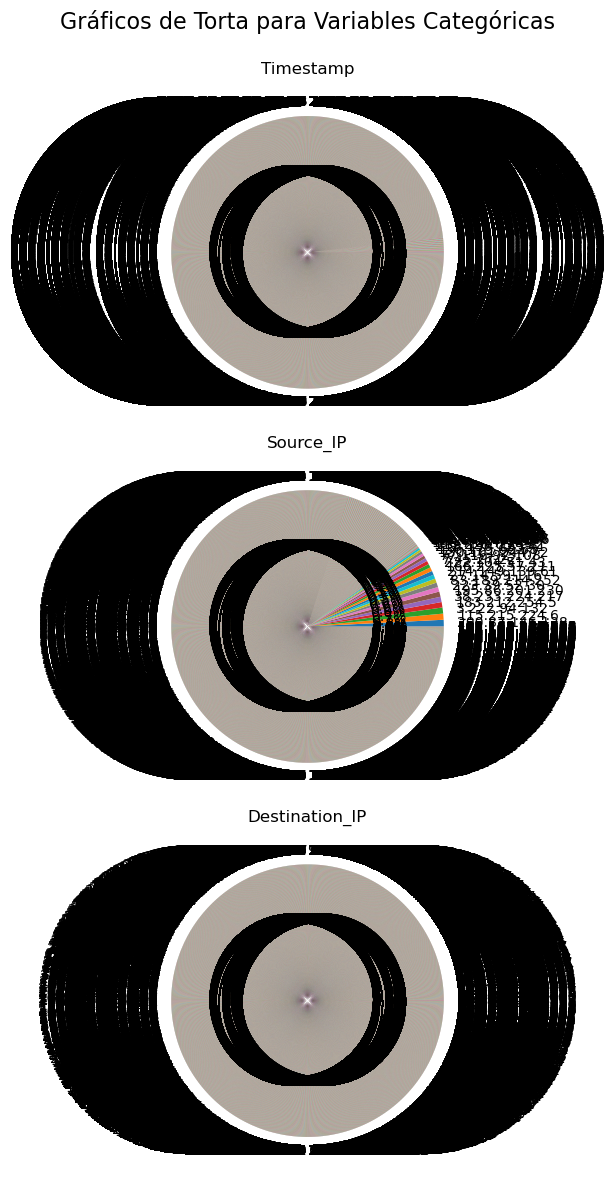

In [12]:
fig, ax = plt.subplots(3, 1, figsize=(12, 12))
ax = ax.flat
cat_col = data.select_dtypes(include='object').columns
cat_col = cat_col.drop(['Request_Type', 'Protocol', 'User_Agent', 'Status', 'Scan_Type'])
for i, col in enumerate(cat_col):
    ax[i].pie(x = data[col].value_counts(),
           labels = data[col].value_counts().index,
           autopct = '%.1f%%')
    ax[i].set_title(col)
fig.tight_layout()
fig.subplots_adjust(top=0.92)
fig.suptitle('Gráficos de Torta para Variables Categóricas', fontsize=16)
plt.show()

**ANÁLISIS**

- Timestamp corresponde a las fechas y horas de la transacción, se podría hacer una conversión a Años o Meses para manejar los datos de esa manera
- Con respecto a Source_IP y Destination_IP no hay mucho que hacer debido a la diferenciación que tiene cada una y el poco impacto que generan sobre el Modelo

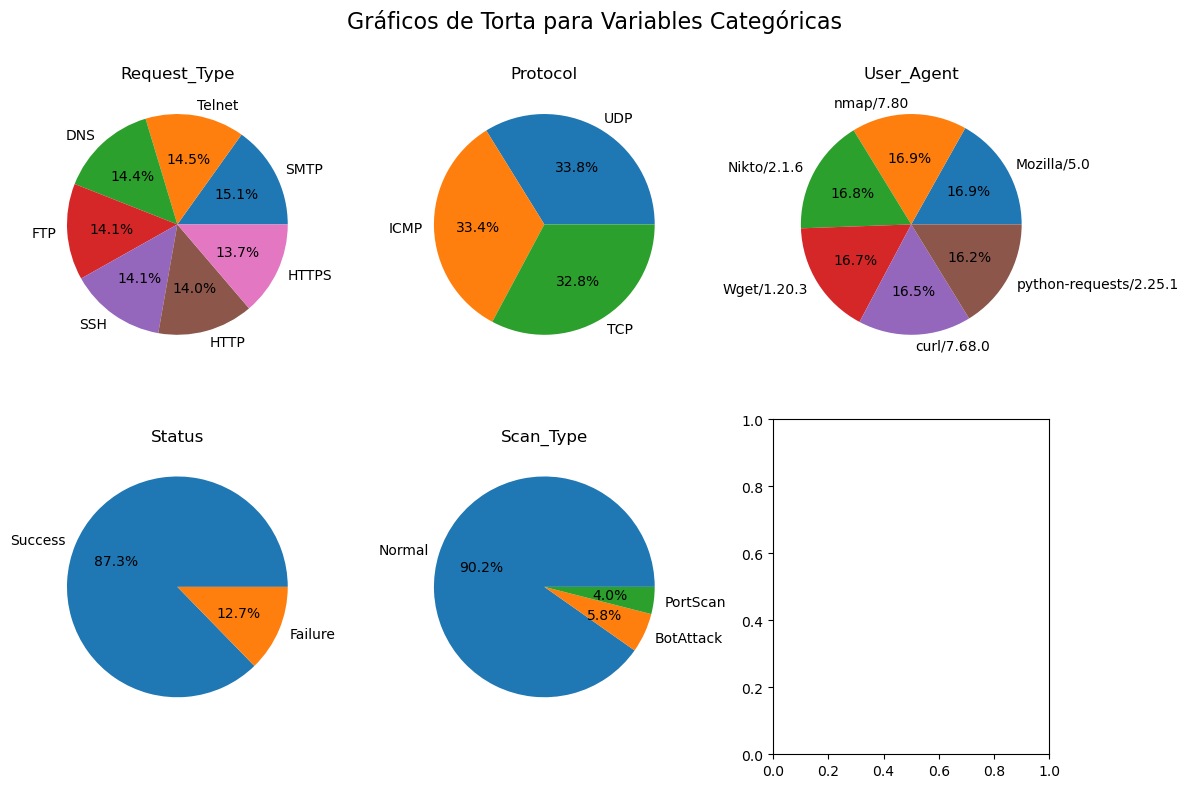

In [13]:
fig, ax = plt.subplots(2 , 3 , figsize=(12,8))
ax =ax.flat
cat_col = data.select_dtypes(include='object').columns
cat_col = cat_col.drop(['Timestamp', 'Source_IP', 'Destination_IP'])  # Excluir columnas no categóricas
for i, col in enumerate(cat_col):
    ax[i].pie(x = data[col].value_counts(),
            labels = data[col].value_counts().index,
            autopct = '%.1f%%')
    ax[i].set_title(col)
fig.tight_layout()
fig.subplots_adjust(top=0.92)
fig.suptitle('Gráficos de Torta para Variables Categóricas', fontsize=16)
plt.show()

**ANÁLISIS**

Las variables `Status` y `Scan_Type` se encuentran desbalanceadas, ambas poseen dos valores con más del 80%

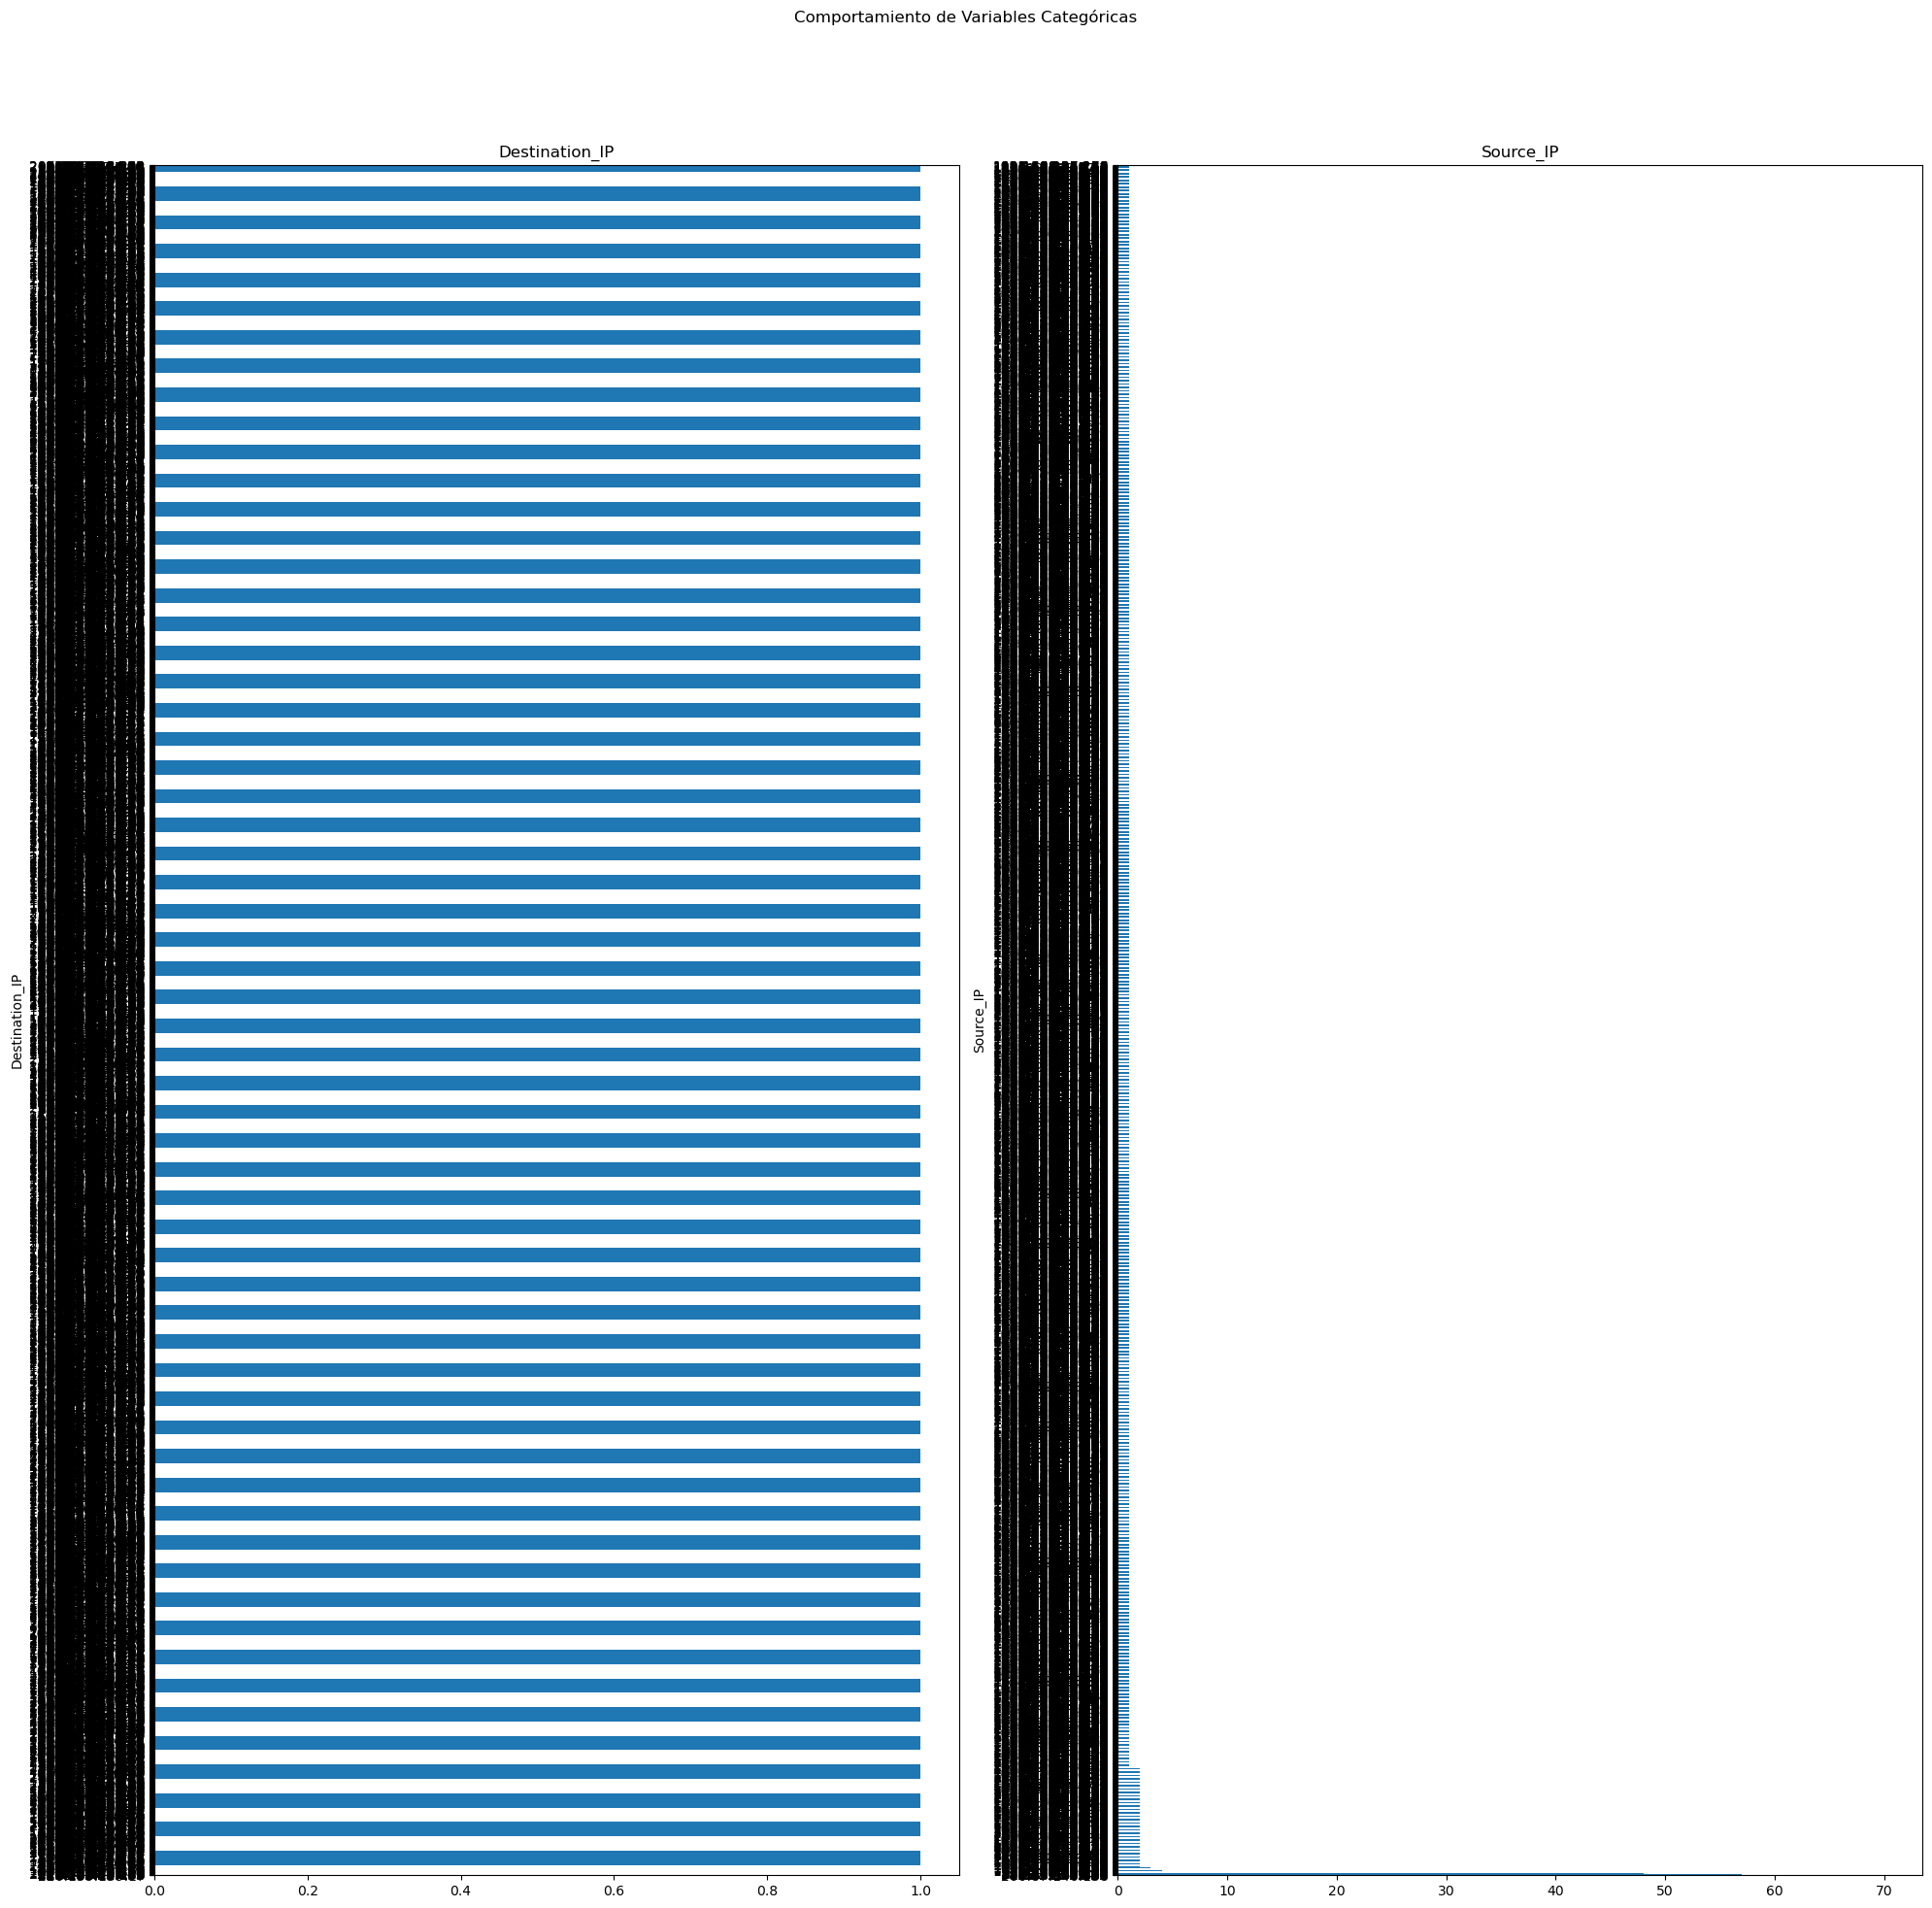

In [14]:
##Gráfico de barras para variables categóricas
fig, ax = plt.subplots(1, 2, figsize = (20, 20))
ax = ax.flat

col = data[['Destination_IP', 'Source_IP']]
for i, col in enumerate(col):
    data[col].value_counts().plot.barh(ax = ax[i])
    ax[i].set_title(col)

fig.tight_layout()
plt.subplots_adjust(top = 0.9)
fig.suptitle('Comportamiento de Variables Categóricas')
plt.show()

## Preparación de los Datos

### Limpieza de los Datos

In [5]:
data_mod = data.drop(columns=['Port', 'Source_IP', 'Destination_IP'])
data_mod

,Timestamp,Request_Type,Protocol,Payload_Size,User_Agent,Status,Intrusion,Scan_Type
0,2025-06-06 06:04:08,SSH,ICMP,2954,Mozilla/5.0,Success,0,Normal
1,2025-06-04 15:20:59,FTP,UDP,206,Wget/1.20.3,Success,0,Normal
2,2025-06-03 07:23:49,SSH,ICMP,977,nmap/7.80,Success,0,Normal
3,2025-06-03 11:35:42,HTTP,TCP,521,curl/7.68.0,Success,0,Normal
4,2025-06-05 06:09:02,Telnet,TCP,251,Wget/1.20.3,Success,0,Normal
...,...,...,...,...,...,...,...,...
8861,2025-06-04 22:16:23,DNS,ICMP,1391,Nikto/2.1.6,Failure,1,BotAttack
8862,2025-06-05 14:43:42,SSH,TCP,2272,curl/7.68.0,Success,0,Normal
8863,2025-06-01 23:27:15,SSH,TCP,2753,python-requests/2.25.1,Success,0,Normal
8864,2025-06-01 00:26:36,DNS,TCP,2792,nmap/7.80,Success,0,Normal


<Axes: ylabel='Days,Months'>

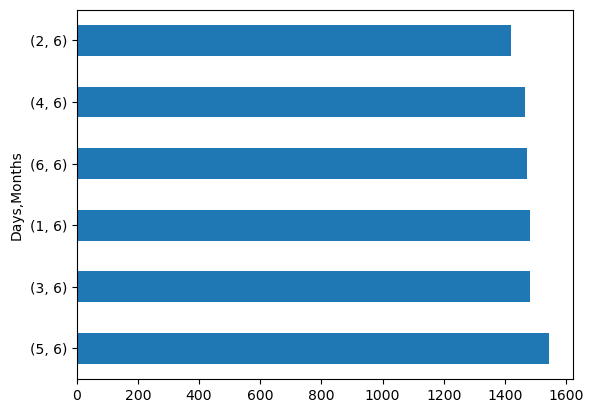

In [6]:
data_mod['Timestamp'] = pd.to_datetime(data_mod['Timestamp'], errors='raise')
data_mod['Months'] = data_mod['Timestamp'].dt.month
data_mod['Days'] = data_mod['Timestamp'].dt.day
data_mod[['Days', 'Months']].value_counts().plot.barh()

In [7]:
data_clean = data_mod.drop(columns=['Timestamp', 'Days', 'Months'])
data_clean

,Request_Type,Protocol,Payload_Size,User_Agent,Status,Intrusion,Scan_Type
0,SSH,ICMP,2954,Mozilla/5.0,Success,0,Normal
1,FTP,UDP,206,Wget/1.20.3,Success,0,Normal
2,SSH,ICMP,977,nmap/7.80,Success,0,Normal
3,HTTP,TCP,521,curl/7.68.0,Success,0,Normal
4,Telnet,TCP,251,Wget/1.20.3,Success,0,Normal
...,...,...,...,...,...,...,...
8861,DNS,ICMP,1391,Nikto/2.1.6,Failure,1,BotAttack
8862,SSH,TCP,2272,curl/7.68.0,Success,0,Normal
8863,SSH,TCP,2753,python-requests/2.25.1,Success,0,Normal
8864,DNS,TCP,2792,nmap/7.80,Success,0,Normal


In [110]:
data_status = data_clean.drop(columns=['Scan_Type'])
data_intrusion = data_clean.drop(columns=['Status', 'Scan_Type'])

### Balanceo

#### Y: Status

In [9]:
data_status_success = data_status[data_status['Status'] == 'Success']
data_status_failure = data_status[data_status['Status'] == 'Failure']

print(f"Success: {data_status_success.shape[0]}")
print(f"Failure: {data_status_failure.shape[0]}")

Success: 7739
Failure: 1127


In [10]:
data_status_failure_re = data_status_failure.sample(data_status_success.shape[0], replace=True)
data_status = pd.concat([data_status_success, data_status_failure_re])
data_status.reset_index(drop=True, inplace=True)
data_status.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15478 entries, 0 to 15477
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Request_Type  15478 non-null  object
 1   Protocol      15478 non-null  object
 2   Payload_Size  15478 non-null  int64 
 3   User_Agent    15478 non-null  object
 4   Status        15478 non-null  object
 5   Intrusion     15478 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 725.7+ KB


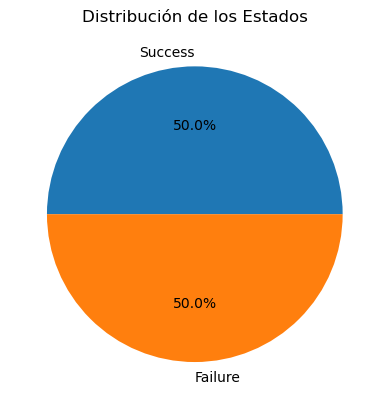

In [11]:
plt.pie(data_status["Status"].value_counts(), labels=data_status["Status"].value_counts().index, autopct='%1.1f%%')
plt.title("Distribución de los Estados")
plt.show()

#### Y: Intrusion

In [111]:
data_intrusion["Intrusion"].value_counts()

Intrusion
0    8000
1     866
Name: count, dtype: int64

In [112]:
data_intrusion_intrusion = data_intrusion[data_intrusion["Intrusion"] == 1]
data_intrusion_no_intrusion = data_intrusion[data_intrusion["Intrusion"] == 0]

print(f"Intrusion: {data_intrusion_intrusion.shape[0]}")
print(f"No Intrusion: {data_intrusion_no_intrusion.shape[0]}")

Intrusion: 866
No Intrusion: 8000


In [113]:
data_intrusion_re = data_intrusion_intrusion.sample(data_intrusion_no_intrusion.shape[0], replace=True)

data_intrusion = pd.concat([data_intrusion_no_intrusion, data_intrusion_re])
data_intrusion.reset_index(drop=True, inplace=True)
data_intrusion.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16000 entries, 0 to 15999
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Request_Type  16000 non-null  object
 1   Protocol      16000 non-null  object
 2   Payload_Size  16000 non-null  int64 
 3   User_Agent    16000 non-null  object
 4   Intrusion     16000 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 625.1+ KB


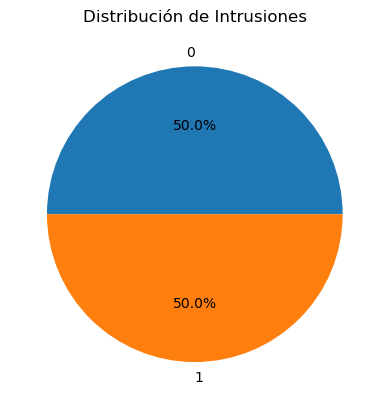

In [114]:
plt.pie(data_intrusion["Intrusion"].value_counts(), labels=data_intrusion["Intrusion"].value_counts().index, autopct='%1.1f%%')
plt.title("Distribución de Intrusiones")
plt.show()

## Y: Intrusion

### Transformación de los Datos

In [74]:
X = data_intrusion.drop(columns=['Intrusion'])
y = data_intrusion['Intrusion']

print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")

X shape: (16000, 4)
y shape: (16000,)


In [75]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.pipeline import Pipeline

In [76]:
num_col = X.select_dtypes(include=['int64', 'float64']).columns
cat_col = X.select_dtypes(include='object').columns

preprocessor = ColumnTransformer(transformers=[
    ('num', MinMaxScaler(), num_col),
    ('cat', OneHotEncoder(sparse_output=True, handle_unknown="ignore"), cat_col)],
    remainder='passthrough',
    sparse_threshold=0.0
)

preprocessor

ColumnTransformer(remainder='passthrough', sparse_threshold=0.0,
                  transformers=[('num', MinMaxScaler(),
                                 Index(['Payload_Size'], dtype='object')),
                                ('cat', OneHotEncoder(handle_unknown='ignore'),
                                 Index(['Request_Type', 'Protocol', 'User_Agent'], dtype='object'))])

In [77]:
X_pre = preprocessor.fit_transform(X)
cod_cat = preprocessor.named_transformers_['cat'].get_feature_names_out(cat_col)
labels = np.concatenate((num_col, cod_cat))
X_pro = pd.DataFrame(X_pre, columns=labels)
X_pro

,Payload_Size,Request_Type_DNS,Request_Type_FTP,Request_Type_HTTP,Request_Type_HTTPS,Request_Type_SMTP,Request_Type_SSH,Request_Type_Telnet,Protocol_ICMP,Protocol_TCP,Protocol_UDP,User_Agent_Mozilla/5.0,User_Agent_Nikto/2.1.6,User_Agent_Wget/1.20.3,User_Agent_curl/7.68.0,User_Agent_nmap/7.80,User_Agent_python-requests/2.25.1
0,0.591865,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.041274,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.195752,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.104388,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.050291,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15995,0.025646,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
15996,0.367261,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
15997,0.003206,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
15998,0.235624,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


### Conjunto de Entrenamiento

In [78]:
from sklearn.model_selection import train_test_split

In [79]:
X_train, X_test, y_train, y_test = train_test_split(X_pro, y, train_size=0.9, random_state=123)

print(f'El Tamaño de X_train es: {X_train.shape}')
print(f'El Tamaño de X_test es: {X_test.shape}')
print(f'El Tamaño de y_train es: {y_train.shape}')
print(f'El Tamaño de y_test es: {y_test.shape}')

El Tamaño de X_train es: (14400, 17)
El Tamaño de X_test es: (1600, 17)
El Tamaño de y_train es: (14400,)
El Tamaño de y_test es: (1600,)


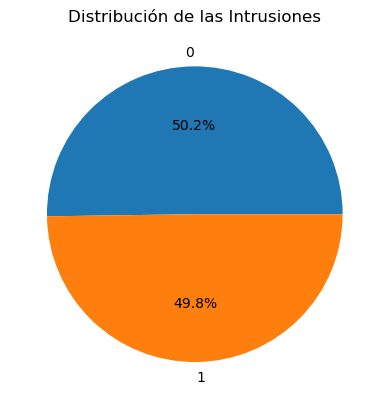

In [81]:
plt.pie(y_train.value_counts(), labels=y_train.value_counts().index, autopct='%1.1f%%')
plt.title("Distribución de las Intrusiones")
plt.show()

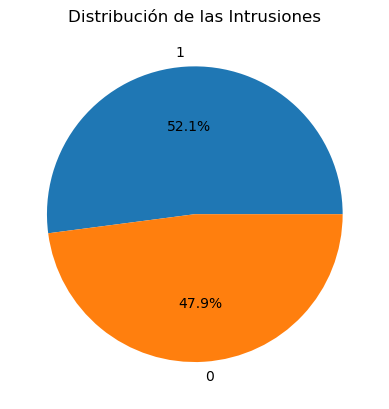

In [83]:
plt.pie(y_test.value_counts(), labels=y_test.value_counts().index, autopct='%1.1f%%')
plt.title("Distribución de las Intrusiones")
plt.show()

### Modelos Y:Intrusion

In [85]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV

#### Regresión Logística

In [84]:
from sklearn.linear_model import LogisticRegression

In [115]:
modelo_1 = LogisticRegression(solver='saga', random_state=123)
param_grid = {'penalty': ['l1', 'l2', 'elasticnet'], "C": [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]}
clf_1 = GridSearchCV(estimator=modelo_1, param_grid=param_grid, cv=5, scoring='f1_weighted')
clf_1.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=LogisticRegression(random_state=123, solver='saga'),
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l1', 'l2', 'elasticnet']},
             scoring='f1_weighted')

In [87]:
validation = pd.concat([pd.DataFrame(clf_1.cv_results_['params']), 
                        pd.DataFrame(clf_1.cv_results_['mean_test_score'], columns=['f1'])],
                       axis=1)
validation.sort_values(by='f1', ascending=False)

,C,penalty,f1
9,0.1000,l1,0.537283
13,1.0000,l2,0.532804
10,0.1000,l2,0.532804
15,10.0000,l1,0.532733
16,10.0000,l2,0.532595
18,100.0000,l1,0.532595
19,100.0000,l2,0.532595
21,1000.0000,l1,0.532595
22,1000.0000,l2,0.532595
7,0.0100,l2,0.532495


In [88]:
modelo_1_final = clf_1.best_estimator_
modelo_1_final

LogisticRegression(C=0.1, penalty='l1', random_state=123, solver='saga')

Metricas de Entrenamiento
              precision    recall  f1-score   support

           0       0.54      0.54      0.54      7233
           1       0.53      0.53      0.53      7167

    accuracy                           0.54     14400
   macro avg       0.54      0.54      0.54     14400
weighted avg       0.54      0.54      0.54     14400

Matriz de Confusion


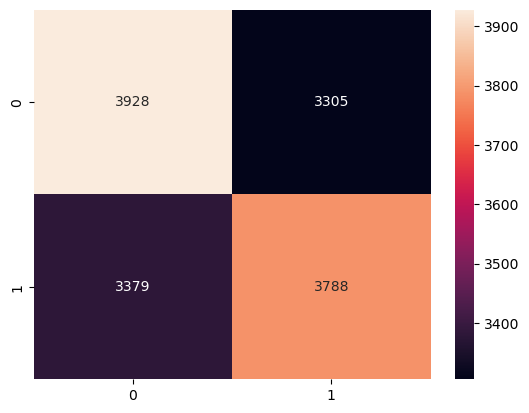

In [89]:
y_pred_1_train = modelo_1_final.predict(X_train)
print("Metricas de Entrenamiento")
print(classification_report(y_train, y_pred_1_train))
print("Matriz de Confusion")
sns.heatmap(confusion_matrix(y_train, y_pred_1_train), annot=True, fmt='d')
plt.show()

Metricas de Prueba
              precision    recall  f1-score   support

           0       0.53      0.57      0.55       767
           1       0.57      0.53      0.55       833

    accuracy                           0.55      1600
   macro avg       0.55      0.55      0.55      1600
weighted avg       0.55      0.55      0.55      1600

Matriz de Confusion


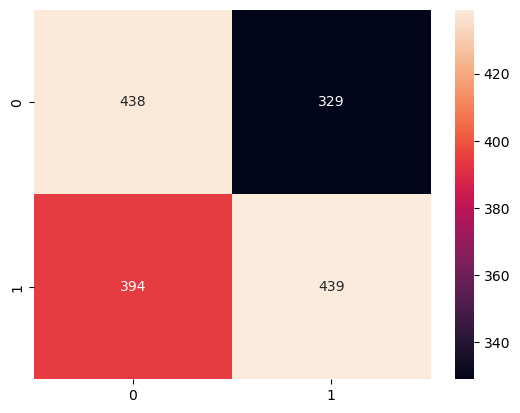

In [90]:
y_pred_1_test = modelo_1_final.predict(X_test)
print("Metricas de Prueba")
print(classification_report(y_test, y_pred_1_test))
print("Matriz de Confusion")
sns.heatmap(confusion_matrix(y_test, y_pred_1_test), annot=True, fmt='d')
plt.show()

#### K Vecinos Mas Cercanos

In [91]:
from sklearn.neighbors import KNeighborsClassifier

In [92]:
modelo_2 = KNeighborsClassifier()
param_grid = {'n_neighbors': [3, 5, 7, 9, 11, 17, 21, 37], "p": [1, 2]}
clf_2 = GridSearchCV(estimator=modelo_2, param_grid=param_grid, cv=5, scoring="f1_weighted")
clf_2.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 7, 9, 11, 17, 21, 37],
                         'p': [1, 2]},
             scoring='f1_weighted')

In [93]:
validation = pd.concat([pd.DataFrame(clf_2.cv_results_['params']),
                        pd.DataFrame(clf_2.cv_results_['mean_test_score'], columns=['f1_weighted'])],
                        axis=1)
validation

,n_neighbors,p,f1_weighted
0,3,1,0.942973
1,3,2,0.943044
2,5,1,0.912125
3,5,2,0.912055
4,7,1,0.879753
5,7,2,0.879896
6,9,1,0.850591
7,9,2,0.850519
8,11,1,0.824319
9,11,2,0.824533


In [94]:
modelo_2_final = clf_2.best_estimator_
modelo_2_final

KNeighborsClassifier(n_neighbors=3)

Metricas de Entrenamiento
              precision    recall  f1-score   support

           0       1.00      0.95      0.98      7233
           1       0.96      1.00      0.98      7167

    accuracy                           0.98     14400
   macro avg       0.98      0.98      0.98     14400
weighted avg       0.98      0.98      0.98     14400

Matriz de Confusion


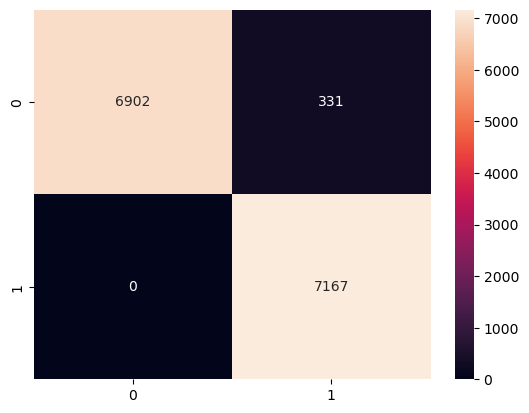

In [95]:
y_pred_2_train = modelo_2_final.predict(X_train)
print("Metricas de Entrenamiento")
print(classification_report(y_train, y_pred_2_train))
print("Matriz de Confusion")
sns.heatmap(confusion_matrix(y_train, y_pred_2_train), annot=True, fmt='d')
plt.show()

Metricas de Prueba
              precision    recall  f1-score   support

           0       1.00      0.91      0.95       767
           1       0.92      1.00      0.96       833

    accuracy                           0.96      1600
   macro avg       0.96      0.95      0.96      1600
weighted avg       0.96      0.96      0.96      1600

Matriz de Confusion


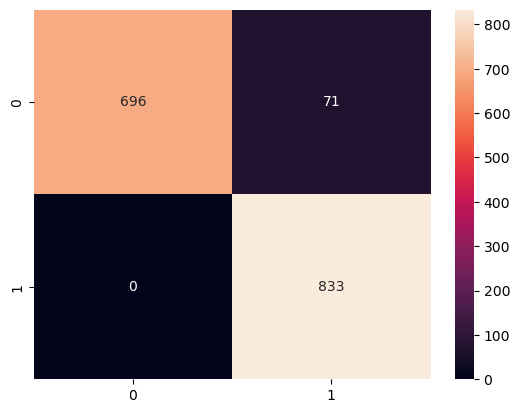

In [96]:
y_pred_2_test = modelo_2_final.predict(X_test)
print("Metricas de Prueba")
print(classification_report(y_test, y_pred_2_test))
print("Matriz de Confusion")
sns.heatmap(confusion_matrix(y_test, y_pred_2_test), annot=True, fmt='d')
plt.show()

#### Máquinas de Soporte Vectorial

In [97]:
from sklearn.svm import SVC

In [104]:
modelo_3 = SVC(random_state=123)
param_grid = [
    {"kernel": ["linear"], "C": [0.01, 0.1, 1, 10, 100]},
    {"kernel": ["rbf"], "C": [0.1, 1, 10], "gamma": ["scale", "auto"]},
    {'kernel': ['poly'],   'C': [0.1, 1, 10], 'degree': [2,3,4], 'gamma': ['scale','auto']},
    {'kernel': ['sigmoid'],'C': [0.1, 1, 10], 'gamma': ['scale','auto']}
]
clf_3 = GridSearchCV(estimator=modelo_3, param_grid=param_grid, cv=5, scoring="f1_weighted", n_jobs=-1, verbose=3)
clf_3.fit(X_train, y_train)

Fitting 5 folds for each of 35 candidates, totalling 175 fits
[CV 1/5] END ..............C=0.1, kernel=linear;, score=0.518 total time=  20.0s
[CV 1/5] END .............C=0.01, kernel=linear;, score=0.521 total time=  20.1s
[CV 3/5] END ..............C=0.1, kernel=linear;, score=0.527 total time=  20.1s
[CV 5/5] END .............C=0.01, kernel=linear;, score=0.537 total time=  20.2s
[CV 3/5] END .............C=0.01, kernel=linear;, score=0.521 total time=  20.3s
[CV 2/5] END .............C=0.01, kernel=linear;, score=0.533 total time=  20.6s
[CV 4/5] END .............C=0.01, kernel=linear;, score=0.523 total time=  20.9s
[CV 2/5] END ..............C=0.1, kernel=linear;, score=0.526 total time=  21.1s
[CV 5/5] END ..............C=0.1, kernel=linear;, score=0.539 total time=  15.3s
[CV 4/5] END ..............C=0.1, kernel=linear;, score=0.527 total time=  15.7s
[CV 5/5] END ................C=1, kernel=linear;, score=0.539 total time=  15.3s
[CV 1/5] END ................C=1, kernel=linear

GridSearchCV(cv=5, estimator=SVC(random_state=123), n_jobs=-1,
             param_grid=[{'C': [0.01, 0.1, 1, 10, 100], 'kernel': ['linear']},
                         {'C': [0.1, 1, 10], 'gamma': ['scale', 'auto'],
                          'kernel': ['rbf']},
                         {'C': [0.1, 1, 10], 'degree': [2, 3, 4],
                          'gamma': ['scale', 'auto'], 'kernel': ['poly']},
                         {'C': [0.1, 1, 10], 'gamma': ['scale', 'auto'],
                          'kernel': ['sigmoid']}],
             scoring='f1_weighted', verbose=3)

In [105]:
validation = pd.concat([pd.DataFrame(clf_3.cv_results_['params']), 
                        pd.DataFrame(clf_3.cv_results_['mean_test_score'], columns=['f1'])],
                       axis=1)
validation.sort_values(by='f1', ascending=False)

,C,kernel,gamma,degree,f1
27,10.00,poly,scale,4.0,0.782749
9,10.00,rbf,scale,NaN,0.781505
25,10.00,poly,scale,3.0,0.780640
23,10.00,poly,scale,2.0,0.774283
19,1.00,poly,scale,3.0,0.753649
17,1.00,poly,scale,2.0,0.751132
7,1.00,rbf,scale,NaN,0.750864
21,1.00,poly,scale,4.0,0.748591
10,10.00,rbf,auto,NaN,0.740498
24,10.00,poly,auto,2.0,0.679142


In [106]:
modelo_3_final = clf_3.best_estimator_
modelo_3_final

SVC(C=10, degree=4, kernel='poly', random_state=123)

Metricas de Entrenamiento
              precision    recall  f1-score   support

           0       0.76      0.86      0.80      7233
           1       0.84      0.72      0.77      7167

    accuracy                           0.79     14400
   macro avg       0.80      0.79      0.79     14400
weighted avg       0.80      0.79      0.79     14400

Matriz de Confusion


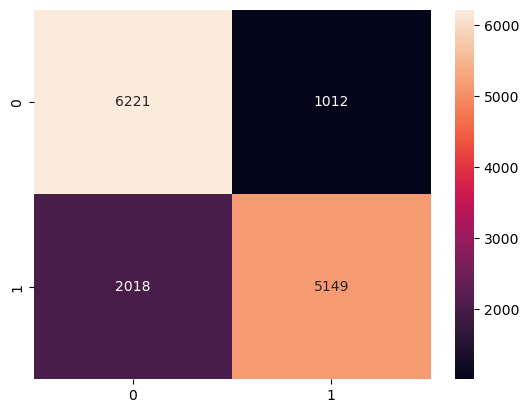

In [107]:
y_pred_3_train = modelo_3_final.predict(X_train)
print("Metricas de Entrenamiento")
print(classification_report(y_train, y_pred_3_train))
print("Matriz de Confusion")
sns.heatmap(confusion_matrix(y_train, y_pred_3_train), annot=True, fmt='d')
plt.show()

Metricas de Prueba
              precision    recall  f1-score   support

           0       0.71      0.85      0.77       767
           1       0.83      0.68      0.75       833

    accuracy                           0.76      1600
   macro avg       0.77      0.77      0.76      1600
weighted avg       0.77      0.76      0.76      1600

Matriz de Confusion


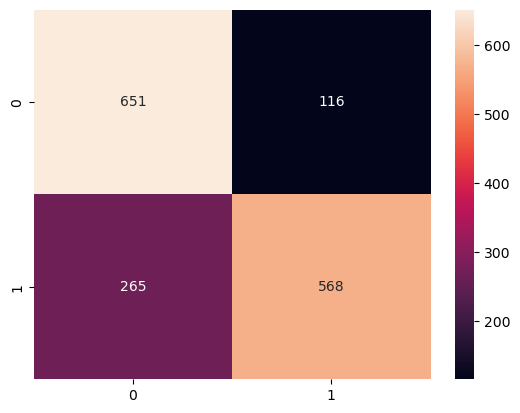

In [108]:
y_pred_3_test = modelo_3_final.predict(X_test)
print("Metricas de Prueba")
print(classification_report(y_test, y_pred_3_test))
print("Matriz de Confusion")
sns.heatmap(confusion_matrix(y_test, y_pred_3_test), annot=True, fmt='d')
plt.show()

#### Árboles de Decisión

In [98]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [99]:
modelo_4 = DecisionTreeClassifier(random_state=123)
param_grid = {'criterion': ['log_loss', 'gini', 'entropy'], 'max_depth':[None, 5, 10, 15, 20], 'max_leaf_nodes':[None, 5, 10, 15, 20],
'min_samples_split': [2, 3, 4]}
clf_4 = GridSearchCV(estimator=modelo_4, param_grid=param_grid, cv=5, scoring="f1_weighted")
clf_4.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=123),
             param_grid={'criterion': ['log_loss', 'gini', 'entropy'],
                         'max_depth': [None, 5, 10, 15, 20],
                         'max_leaf_nodes': [None, 5, 10, 15, 20],
                         'min_samples_split': [2, 3, 4]},
             scoring='f1_weighted')

In [100]:
validation = pd.concat([pd.DataFrame(clf_4.cv_results_['params']), 
                        pd.DataFrame(clf_4.cv_results_['mean_test_score'], columns=['f1'])],
                       axis=1)
validation.sort_values(by='f1', ascending=False)

,criterion,max_depth,max_leaf_nodes,min_samples_split,f1
152,entropy,NaN,NaN,4,0.973945
2,log_loss,NaN,NaN,4,0.973945
1,log_loss,NaN,NaN,3,0.973736
151,entropy,NaN,NaN,3,0.973736
0,log_loss,NaN,NaN,2,0.973735
...,...,...,...,...,...
183,entropy,10.0,5.0,2,0.827899
184,entropy,10.0,5.0,3,0.827899
185,entropy,10.0,5.0,4,0.827899
198,entropy,15.0,5.0,2,0.827899


Profundidad del árbol: 41
 Número de hojas: 687


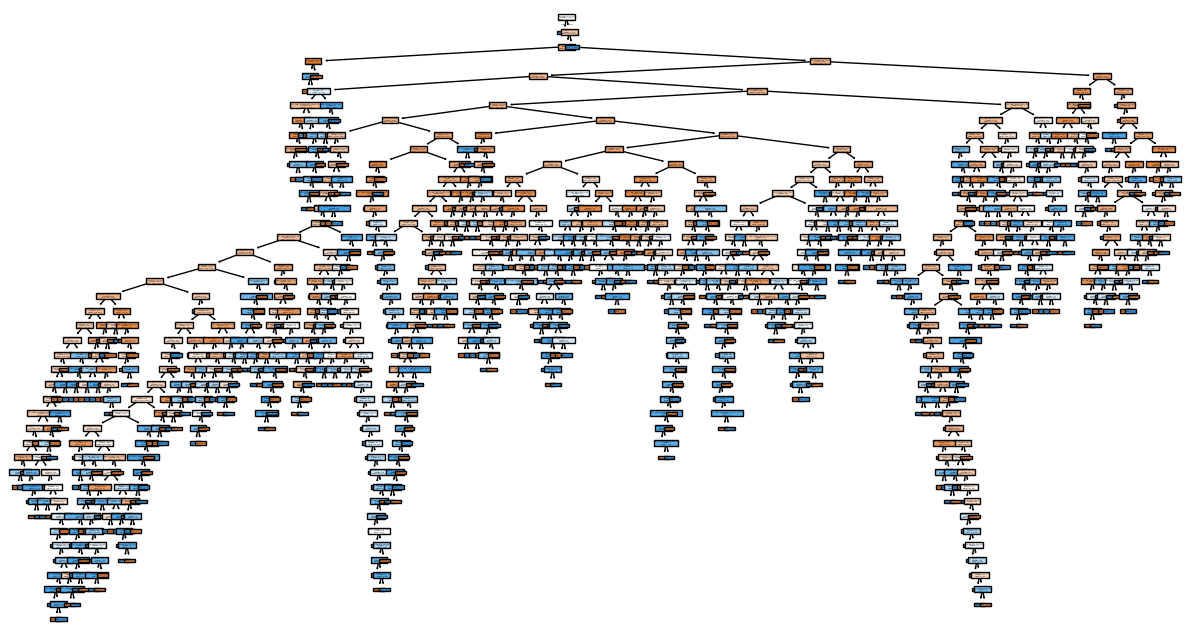

In [101]:
modelo_4_final = clf_4.best_estimator_
fig, ax = plt.subplots(figsize=(15, 8))
print(f"Profundidad del árbol: {modelo_4_final.get_depth()}\n Número de hojas: {modelo_4_final.get_n_leaves()}")
plot = plot_tree(modelo_4_final, feature_names=labels, filled=True, impurity=False, ax=ax)

Metricas de Entrenamiento
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7233
           1       1.00      1.00      1.00      7167

    accuracy                           1.00     14400
   macro avg       1.00      1.00      1.00     14400
weighted avg       1.00      1.00      1.00     14400

Matriz de Confusion


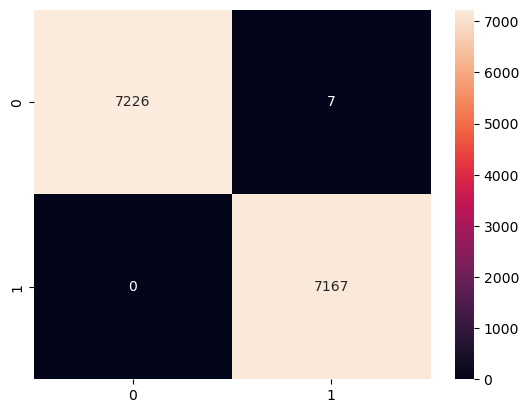

In [102]:
y_pred_4_train = modelo_4_final.predict(X_train)
print("Metricas de Entrenamiento")
print(classification_report(y_train, y_pred_4_train))
print("Matriz de Confusion")
sns.heatmap(confusion_matrix(y_train, y_pred_4_train), annot=True, fmt='d')
plt.show()

Metricas de Prueba
              precision    recall  f1-score   support

           0       1.00      0.95      0.98       767
           1       0.96      1.00      0.98       833

    accuracy                           0.98      1600
   macro avg       0.98      0.98      0.98      1600
weighted avg       0.98      0.98      0.98      1600

Matriz de Confusion


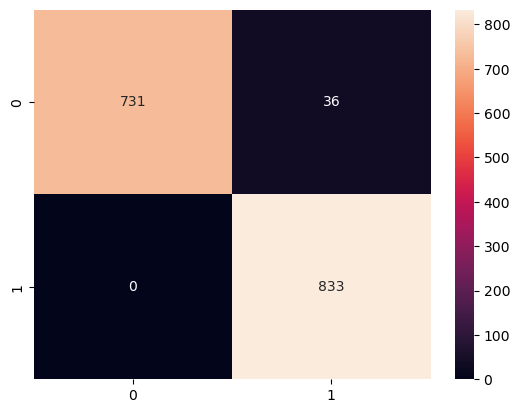

In [103]:
y_pred_4_test = modelo_4_final.predict(X_test)
print("Metricas de Prueba")
print(classification_report(y_test, y_pred_4_test))
print("Matriz de Confusion")
sns.heatmap(confusion_matrix(y_test, y_pred_4_test), annot=True, fmt='d')
plt.show()

### Conclusiones

Con respecto a los modelos evaluados pudimos determinar que Regresión Logística y Máquinas de Soporte Vectorial no se consideran debido a su bajo accuracy en el **f1-score** con 0.55 y 0.76 respectivamente, lo que es un mal indicador y ni si quiera superan el requisito del 80%. Por otro lado, los modelos de K Vecinos Mas Cercanos y Árboles de decisión retornaron una valoración muy alta con 0.96 y 0.98. Finalmente, decidimos quedarnos con los Árboles de Decisión que representaron la mejor valoración para la solución de nuestro problema

## Y: Status

### Transformación de Datos

In [15]:
X = data_status.drop(columns=['Status'])
y = data_status['Status']

print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")

X shape: (15478, 5)
y shape: (15478,)


In [16]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.pipeline import Pipeline

In [17]:
num_col = X.select_dtypes(include=['int64', 'float64']).columns
cat_col = X.select_dtypes(include='object').columns

preprocessor = ColumnTransformer(transformers=[
    ('num', MinMaxScaler(), num_col),
    ('cat', OneHotEncoder(sparse_output=True, handle_unknown="ignore"), cat_col)],
    remainder='passthrough',
    sparse_threshold=0.0
)

preprocessor

ColumnTransformer(remainder='passthrough', sparse_threshold=0.0,
                  transformers=[('num', MinMaxScaler(),
                                 Index(['Payload_Size', 'Intrusion'], dtype='object')),
                                ('cat', OneHotEncoder(handle_unknown='ignore'),
                                 Index(['Request_Type', 'Protocol', 'User_Agent'], dtype='object'))])

In [18]:
X_pre = preprocessor.fit_transform(X)
cod_cat = preprocessor.named_transformers_['cat'].get_feature_names_out(cat_col)
labels = np.concatenate((num_col, cod_cat))
X_pro = pd.DataFrame(X_pre, columns=labels)
X_pro

,Payload_Size,Intrusion,Request_Type_DNS,Request_Type_FTP,Request_Type_HTTP,Request_Type_HTTPS,Request_Type_SMTP,Request_Type_SSH,Request_Type_Telnet,Protocol_ICMP,Protocol_TCP,Protocol_UDP,User_Agent_Mozilla/5.0,User_Agent_Nikto/2.1.6,User_Agent_Wget/1.20.3,User_Agent_curl/7.68.0,User_Agent_nmap/7.80,User_Agent_python-requests/2.25.1
0,0.591865,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.041274,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.195752,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.104388,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.050291,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15473,0.506111,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
15474,0.107994,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
15475,0.040072,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
15476,0.827690,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


### Conjunto de Entrenamiento

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X_pro, y, train_size=0.9, random_state=123)

print(f'El Tamaño de X_train es: {X_train.shape}')
print(f'El Tamaño de X_test es: {X_test.shape}')
print(f'El Tamaño de y_train es: {y_train.shape}')
print(f'El Tamaño de y_test es: {y_test.shape}')

El Tamaño de X_train es: (13930, 18)
El Tamaño de X_test es: (1548, 18)
El Tamaño de y_train es: (13930,)
El Tamaño de y_test es: (1548,)


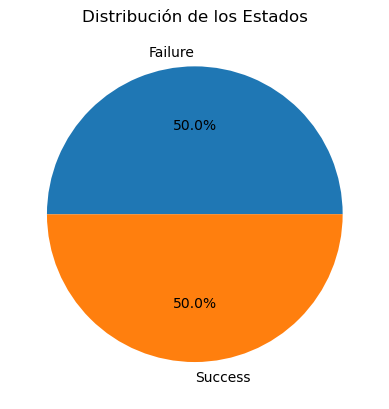

In [21]:
plt.pie(y_train.value_counts(), labels=y_train.value_counts().index, autopct='%1.1f%%')
plt.title("Distribución de los Estados")
plt.show()

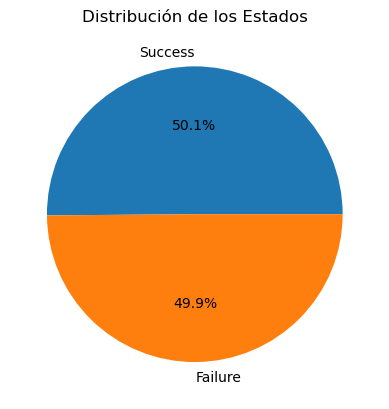

In [22]:
plt.pie(y_test.value_counts(), labels=y_test.value_counts().index, autopct='%1.1f%%')
plt.title("Distribución de los Estados")
plt.show()

### Modelos Y:Status

In [23]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV

#### Regresión Logística

In [40]:
from sklearn.linear_model import LogisticRegression

In [41]:
modelo_1 = LogisticRegression(solver='saga', random_state=123)
param_grid = {'penalty': ['l1', 'l2', 'elasticnet'], "C": [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]}
clf_1 = GridSearchCV(estimator=modelo_1, param_grid=param_grid, cv=5, scoring='f1_weighted')
clf_1.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=LogisticRegression(random_state=123, solver='saga'),
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l1', 'l2', 'elasticnet']},
             scoring='f1_weighted')

In [52]:
validation = pd.concat([pd.DataFrame(clf_1.cv_results_['params']), 
                        pd.DataFrame(clf_1.cv_results_['mean_test_score'], columns=['f1'])],
                       axis=1)
validation.sort_values(by='f1', ascending=False)

,C,penalty,f1
1,0.0001,l2,0.811106
3,0.0010,l1,0.811106
4,0.0010,l2,0.811106
6,0.0100,l1,0.811106
7,0.0100,l2,0.811106
9,0.1000,l1,0.811106
10,0.1000,l2,0.811106
12,1.0000,l1,0.811106
13,1.0000,l2,0.811106
15,10.0000,l1,0.811106


In [43]:
modelo_1_final = clf_1.best_estimator_
modelo_1_final

LogisticRegression(C=0.0001, random_state=123, solver='saga')

Metricas de Entrenamiento
              precision    recall  f1-score   support

     Failure       0.97      0.65      0.78      6967
     Success       0.74      0.98      0.84      6963

    accuracy                           0.82     13930
   macro avg       0.86      0.82      0.81     13930
weighted avg       0.86      0.82      0.81     13930

Matriz de Confusion


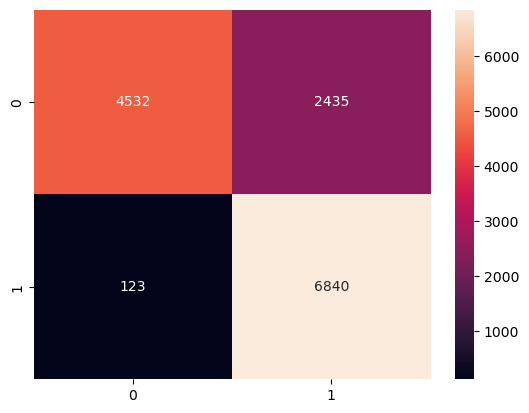

In [44]:
y_pred_1_train = modelo_1_final.predict(X_train)
print("Metricas de Entrenamiento")
print(classification_report(y_train, y_pred_1_train))
print("Matriz de Confusion")
sns.heatmap(confusion_matrix(y_train, y_pred_1_train), annot=True, fmt='d')
plt.show()

Metricas de Prueba
              precision    recall  f1-score   support

     Failure       0.98      0.63      0.77       772
     Success       0.73      0.99      0.84       776

    accuracy                           0.81      1548
   macro avg       0.86      0.81      0.81      1548
weighted avg       0.86      0.81      0.81      1548

Matriz de Confusion


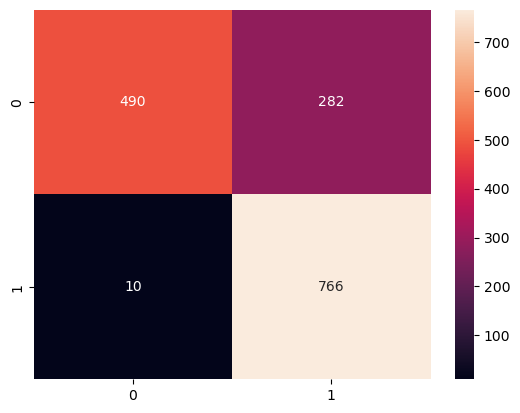

In [45]:
y_pred_1_test = modelo_1_final.predict(X_test)
print("Metricas de Prueba")
print(classification_report(y_test, y_pred_1_test))
print("Matriz de Confusion")
sns.heatmap(confusion_matrix(y_test, y_pred_1_test), annot=True, fmt='d')
plt.show()

#### K Vecinos Mas Cercanos

In [46]:
from sklearn.neighbors import KNeighborsClassifier

In [47]:
modelo_2 = KNeighborsClassifier()
param_grid = {'n_neighbors': [3, 5, 7, 9, 11, 17, 21, 37], "p": [1, 2]}
clf_2 = GridSearchCV(estimator=modelo_2, param_grid=param_grid, cv=5, scoring="f1_weighted")
clf_2.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 7, 9, 11, 17, 21, 37],
                         'p': [1, 2]},
             scoring='f1_weighted')

In [48]:
validation = pd.concat([pd.DataFrame(clf_2.cv_results_['params']),
                        pd.DataFrame(clf_2.cv_results_['mean_test_score'], columns=['f1_weighted'])],
                        axis=1)
validation

,n_neighbors,p,f1_weighted
0,3,1,0.921148
1,3,2,0.921002
2,5,1,0.890975
3,5,2,0.890682
4,7,1,0.859698
5,7,2,0.859772
6,9,1,0.839839
7,9,2,0.839839
8,11,1,0.831704
9,11,2,0.831704


In [49]:
modelo_2_final = clf_2.best_estimator_
modelo_2_final

KNeighborsClassifier(n_neighbors=3, p=1)

Metricas de Entrenamiento
              precision    recall  f1-score   support

     Failure       0.93      1.00      0.96      6967
     Success       1.00      0.93      0.96      6963

    accuracy                           0.96     13930
   macro avg       0.97      0.96      0.96     13930
weighted avg       0.97      0.96      0.96     13930

Matriz de Confusion


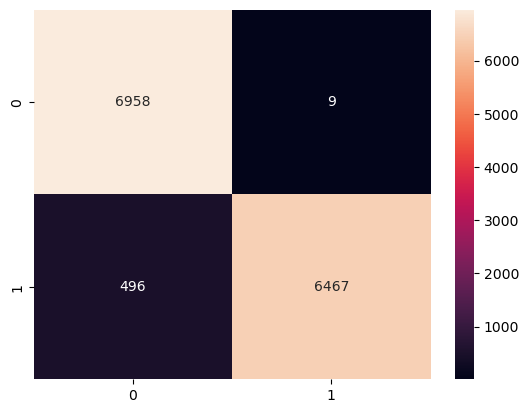

In [50]:
y_pred_2_train = modelo_2_final.predict(X_train)
print("Metricas de Entrenamiento")
print(classification_report(y_train, y_pred_2_train))
print("Matriz de Confusion")
sns.heatmap(confusion_matrix(y_train, y_pred_2_train), annot=True, fmt='d')
plt.show()

Metricas de Prueba
              precision    recall  f1-score   support

     Failure       0.89      0.99      0.94       772
     Success       0.99      0.88      0.93       776

    accuracy                           0.94      1548
   macro avg       0.94      0.94      0.94      1548
weighted avg       0.94      0.94      0.94      1548

Matriz de Confusion


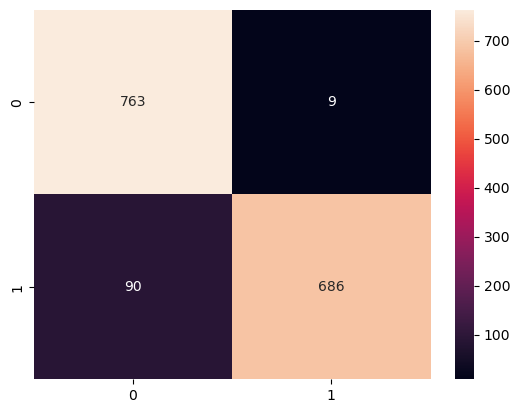

In [51]:
y_pred_2_test = modelo_2_final.predict(X_test)
print("Metricas de Prueba")
print(classification_report(y_test, y_pred_2_test))
print("Matriz de Confusion")
sns.heatmap(confusion_matrix(y_test, y_pred_2_test), annot=True, fmt='d')
plt.show()

#### Máquinas de Soporte Vectorial

In [24]:
from sklearn.svm import SVC

In [25]:
modelo_3 = SVC(random_state=123)
param_grid = [
    {"kernel": ["linear"], "C": [0.01, 0.1, 1, 10, 100]},
    {"kernel": ["rbf"], "C": [0.1, 1, 10], "gamma": ["scale", "auto"]},
    {'kernel': ['poly'],   'C': [0.1, 1, 10], 'degree': [2,3,4], 'gamma': ['scale','auto']},
    {'kernel': ['sigmoid'],'C': [0.1, 1, 10], 'gamma': ['scale','auto']}
]
clf_3 = GridSearchCV(estimator=modelo_3, param_grid=param_grid, cv=5, scoring="f1_weighted", n_jobs=-1, verbose=3)
clf_3.fit(X_train, y_train)

Fitting 5 folds for each of 35 candidates, totalling 175 fits
[CV 1/5] END ..............C=0.1, kernel=linear;, score=0.810 total time=   5.3s
[CV 2/5] END ..............C=0.1, kernel=linear;, score=0.813 total time=   5.4s
[CV 3/5] END ..............C=0.1, kernel=linear;, score=0.829 total time=   5.5s
[CV 4/5] END .............C=0.01, kernel=linear;, score=0.792 total time=   5.6s
[CV 5/5] END .............C=0.01, kernel=linear;, score=0.811 total time=   5.7s
[CV 1/5] END .............C=0.01, kernel=linear;, score=0.810 total time=   5.8s
[CV 2/5] END .............C=0.01, kernel=linear;, score=0.813 total time=   5.9s
[CV 3/5] END .............C=0.01, kernel=linear;, score=0.829 total time=   6.0s
[CV 4/5] END ..............C=0.1, kernel=linear;, score=0.792 total time=   5.0s
[CV 4/5] END ................C=1, kernel=linear;, score=0.792 total time=   4.7s
[CV 5/5] END ..............C=0.1, kernel=linear;, score=0.811 total time=   5.2s
[CV 2/5] END ................C=1, kernel=linear

Exception ignored in: <function ResourceTracker.__del__ at 0x107c23100>
Traceback (most recent call last):
  File "/Users/loperatomas410/anaconda3/envs/data/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/Users/loperatomas410/anaconda3/envs/data/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/Users/loperatomas410/anaconda3/envs/data/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes
Exception ignored in: <function ResourceTracker.__del__ at 0x10560b100>
Traceback (most recent call last):
  File "/Users/loperatomas410/anaconda3/envs/data/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/Users/loperatomas410/anaconda3/envs/data/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/Users/loperatomas410/anaconda3/envs/data/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _sto

[CV 2/5] END ..............C=100, kernel=linear;, score=0.813 total time=18.2min
[CV 4/5] END ..............C=100, kernel=linear;, score=0.792 total time=18.6min
[CV 3/5] END ..............C=100, kernel=linear;, score=0.829 total time=19.4min
[CV 1/5] END ..............C=100, kernel=linear;, score=0.810 total time=19.9min
[CV 5/5] END ..............C=100, kernel=linear;, score=0.811 total time=19.8min


GridSearchCV(cv=5, estimator=SVC(random_state=123), n_jobs=-1,
             param_grid=[{'C': [0.01, 0.1, 1, 10, 100], 'kernel': ['linear']},
                         {'C': [0.1, 1, 10], 'gamma': ['scale', 'auto'],
                          'kernel': ['rbf']},
                         {'C': [0.1, 1, 10], 'degree': [2, 3, 4],
                          'gamma': ['scale', 'auto'], 'kernel': ['poly']},
                         {'C': [0.1, 1, 10], 'gamma': ['scale', 'auto'],
                          'kernel': ['sigmoid']}],
             scoring='f1_weighted', verbose=3)

In [26]:
validation = pd.concat([pd.DataFrame(clf_3.cv_results_['params']), 
                        pd.DataFrame(clf_3.cv_results_['mean_test_score'], columns=['f1'])],
                       axis=1)
validation.sort_values(by='f1', ascending=False)

,C,kernel,gamma,degree,f1
0,0.01,linear,NaN,NaN,0.811106
13,0.10,poly,scale,3.0,0.811106
32,1.00,sigmoid,auto,NaN,0.811106
30,0.10,sigmoid,auto,NaN,0.811106
28,10.00,poly,auto,4.0,0.811106
26,10.00,poly,auto,3.0,0.811106
24,10.00,poly,auto,2.0,0.811106
23,10.00,poly,scale,2.0,0.811106
20,1.00,poly,auto,3.0,0.811106
18,1.00,poly,auto,2.0,0.811106


In [27]:
modelo_3_final = clf_3.best_estimator_
modelo_3_final

SVC(C=0.01, kernel='linear', random_state=123)

Metricas de Entrenamiento
              precision    recall  f1-score   support

     Failure       0.97      0.65      0.78      6967
     Success       0.74      0.98      0.84      6963

    accuracy                           0.82     13930
   macro avg       0.86      0.82      0.81     13930
weighted avg       0.86      0.82      0.81     13930

Matriz de Confusion


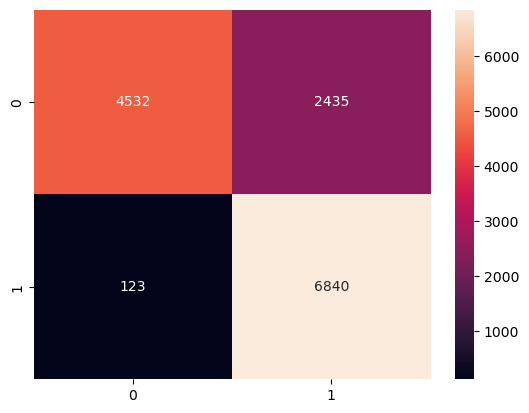

In [28]:
y_pred_3_train = modelo_3_final.predict(X_train)
print("Metricas de Entrenamiento")
print(classification_report(y_train, y_pred_3_train))
print("Matriz de Confusion")
sns.heatmap(confusion_matrix(y_train, y_pred_3_train), annot=True, fmt='d')
plt.show()

Metricas de Prueba
              precision    recall  f1-score   support

     Failure       0.98      0.63      0.77       772
     Success       0.73      0.99      0.84       776

    accuracy                           0.81      1548
   macro avg       0.86      0.81      0.81      1548
weighted avg       0.86      0.81      0.81      1548

Matriz de Confusion


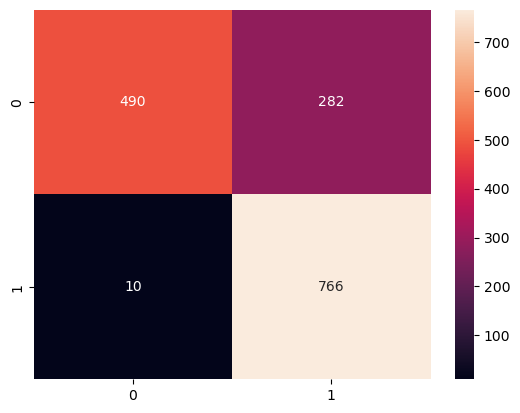

In [29]:
y_pred_3_test = modelo_3_final.predict(X_test)
print("Metricas de Prueba")
print(classification_report(y_test, y_pred_3_test))
print("Matriz de Confusion")
sns.heatmap(confusion_matrix(y_test, y_pred_3_test), annot=True, fmt='d')
plt.show()

#### Árboles de Decisión

In [30]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [34]:
modelo_4 = DecisionTreeClassifier(random_state=123)
param_grid = {'criterion': ['log_loss', 'gini', 'entropy'], 'max_depth':[None, 5, 10, 15, 20], 'max_leaf_nodes':[None, 5, 10, 15, 20],
'min_samples_split': [2, 3, 4]}
clf_4 = GridSearchCV(estimator=modelo_4, param_grid=param_grid, cv=5, scoring="f1_weighted")
clf_4.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=123),
             param_grid={'criterion': ['log_loss', 'gini', 'entropy'],
                         'max_depth': [None, 5, 10, 15, 20],
                         'max_leaf_nodes': [None, 5, 10, 15, 20],
                         'min_samples_split': [2, 3, 4]},
             scoring='f1_weighted')

In [35]:
validation = pd.concat([pd.DataFrame(clf_4.cv_results_['params']), 
                        pd.DataFrame(clf_4.cv_results_['mean_test_score'], columns=['f1'])],
                       axis=1)
validation.sort_values(by='f1', ascending=False)

,criterion,max_depth,max_leaf_nodes,min_samples_split,f1
76,gini,NaN,NaN,3,0.956065
75,gini,NaN,NaN,2,0.955560
77,gini,NaN,NaN,4,0.953623
0,log_loss,NaN,NaN,2,0.952239
150,entropy,NaN,NaN,2,0.952239
...,...,...,...,...,...
184,entropy,10.0,5.0,3,0.810820
185,entropy,10.0,5.0,4,0.810820
65,log_loss,20.0,5.0,4,0.810820
198,entropy,15.0,5.0,2,0.810820


Profundidad del árbol: 38
 Número de hojas: 1062


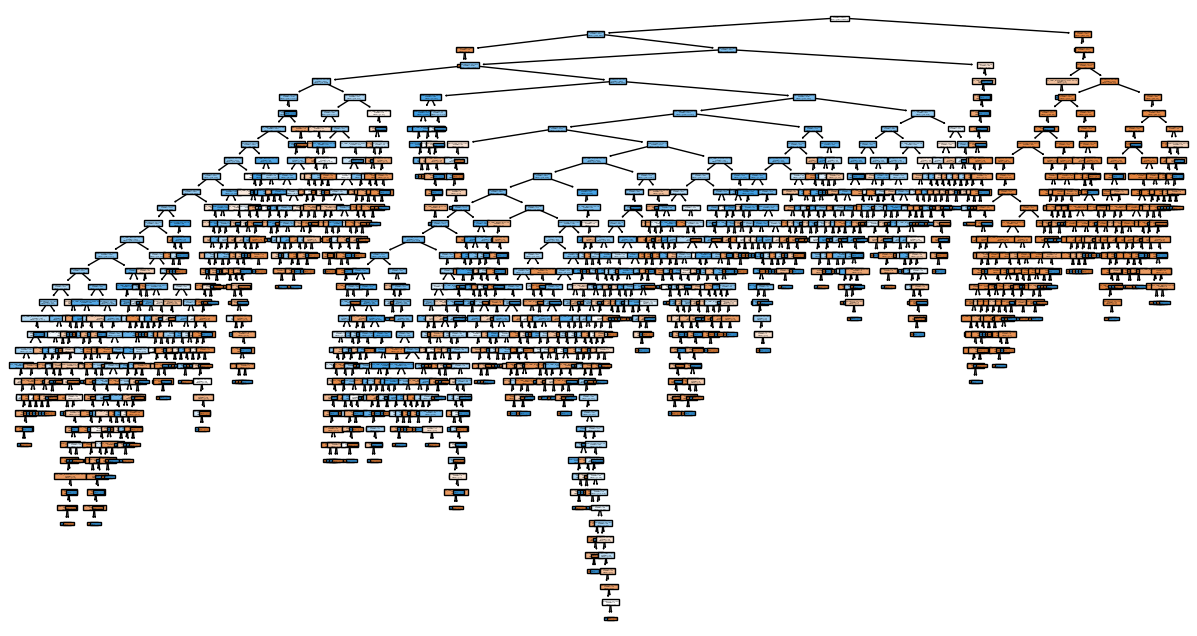

In [36]:
modelo_4_final = clf_4.best_estimator_
fig, ax = plt.subplots(figsize=(15, 8))
print(f"Profundidad del árbol: {modelo_4_final.get_depth()}\n Número de hojas: {modelo_4_final.get_n_leaves()}")
plot = plot_tree(modelo_4_final, feature_names=labels, filled=True, impurity=False, ax=ax)

Metricas de Entrenamiento
              precision    recall  f1-score   support

     Failure       1.00      1.00      1.00      6967
     Success       1.00      1.00      1.00      6963

    accuracy                           1.00     13930
   macro avg       1.00      1.00      1.00     13930
weighted avg       1.00      1.00      1.00     13930

Matriz de Confusion


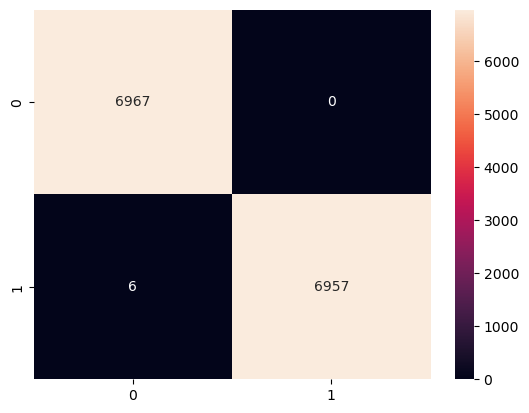

In [37]:
y_pred_4_train = modelo_4_final.predict(X_train)
print("Metricas de Entrenamiento")
print(classification_report(y_train, y_pred_4_train))
print("Matriz de Confusion")
sns.heatmap(confusion_matrix(y_train, y_pred_4_train), annot=True, fmt='d')
plt.show()

Metricas de Prueba
              precision    recall  f1-score   support

     Failure       0.94      1.00      0.97       772
     Success       1.00      0.94      0.97       776

    accuracy                           0.97      1548
   macro avg       0.97      0.97      0.97      1548
weighted avg       0.97      0.97      0.97      1548

Matriz de Confusion


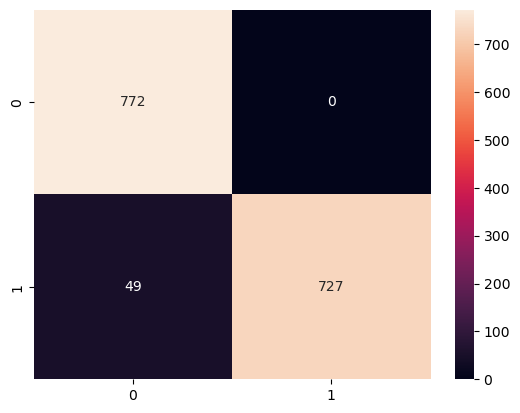

In [38]:
y_pred_4_test = modelo_4_final.predict(X_test)
print("Metricas de Prueba")
print(classification_report(y_test, y_pred_4_test))
print("Matriz de Confusion")
sns.heatmap(confusion_matrix(y_test, y_pred_4_test), annot=True, fmt='d')
plt.show()